In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = '/Users/Willie/16k_500ms'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['的一個', '啦', '的那個', '好', '那那個', 'backgroundNoise', '你', 'ㄟ', '著', '吼', '嗯', '的', '阿', 'ㄏㄧㄡ', '我', '他', '那', '的這個']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = '/Users/Willie/16k_500ms.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 9.  4.  5.  5. 10. 12.  5.  5. 14.  5.  5.  6.  3. 13.  6.  5.  3. 12.
 12. 16. 15.  5.  3.  6.  1.  7.  0.  5.  7.  5. 11.  5.  5.  5.  0. 15.
  7.  5. 10. 17. 10.  6. 12.  5.  5.  3.  5.  4. 17. 17.  5.  5. 14.  5.
  5.  5.  5.  5.  5.  5.  5.  5. 16.  4.  5.  2. 13.  3.  5.  5. 17.  5.
 10. 11.  9.  5. 12.  1.  0.  5. 16. 11.  5. 13.  5.  5.  5.  5.  5. 15.
 12.  5.  5. 13.  5. 16.  6.  8.  5.  7.  5. 17.  5. 15.  5. 15.  6.  4.
  7.  7.  5.  3. 16. 17.  0.  3.  7.]
[ 5.  9.  5. 10.  5.  5.  5.  4.  3.  6.  1.  2. 16.  4.  7. 16.  5. 15.
  5.  2. 17.  7.  7.  5.  5.  1. 17.  5.  5.  5. 11.  4. 14.  1.  3. 10.
 12.  2.  0. 15.  5.  9.  1. 13.  5.  5.  5.  5.  5.  6.  5.  2. 13. 13.
  8.  5.  7.  9.  1.  5.  5.  5.  4.  7.  5.  2. 14.  5.  5.  5. 11. 16.
  5.  5. 15. 15.  8.  5. 12. 10.  6. 17.  5.  5.  9.  5.  5.  2.  2.  5.
 13.  5. 12.  5. 15.  9.  9.  5.  8.  2. 10. 12. 17.  1.  9. 16.  5.  5.
  5. 17. 17.  0. 16.  5.  5.  5.  9.  7. 11.  5.  0.  5.  5.  7.  5.  9.
  1.  5.  5. 

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(942, 23, 16)
(117, 23, 16)
(117, 23, 16)


In [7]:
# Peek at labels
print(y_val)

[ 5. 10.  5.  5.  5.  3.  4. 13.  3.  5.  5.  5.  5.  1. 13. 11.  5.  5.
 12.  5.  5.  5.  5.  5. 16.  0.  5. 16.  5.  5.  1.  5.  5.  5.  5.  5.
  7. 16.  5.  5.  0.  4.  5.  5.  4. 16.  5. 15.  5. 15.  5.  0.  4.  5.
  5. 12.  1.  6. 11. 16. 17. 12.  5. 10.  5.  2. 14.  5.  5.  4.  5.  5.
  6. 14.  5.  5.  5. 17.  5. 14. 13.  5.  5. 13.  5. 11.  6.  0.  7. 17.
  5. 10.  5.  4.  5.  2.  3.  5. 17.  6. 16.  3.  6.  5. 14.  5.  7. 11.
  5. 10. 14.  5.  5. 12.  5.  8. 12.]


In [8]:
# Peek at labels after conversion
print(y_test)

[ 9.  4.  5.  5. 10. 12.  5.  5. 14.  5.  5.  6.  3. 13.  6.  5.  3. 12.
 12. 16. 15.  5.  3.  6.  1.  7.  0.  5.  7.  5. 11.  5.  5.  5.  0. 15.
  7.  5. 10. 17. 10.  6. 12.  5.  5.  3.  5.  4. 17. 17.  5.  5. 14.  5.
  5.  5.  5.  5.  5.  5.  5.  5. 16.  4.  5.  2. 13.  3.  5.  5. 17.  5.
 10. 11.  9.  5. 12.  1.  0.  5. 16. 11.  5. 13.  5.  5.  5.  5.  5. 15.
 12.  5.  5. 13.  5. 16.  6.  8.  5.  7.  5. 17.  5. 15.  5. 15.  6.  4.
  7.  7.  5.  3. 16. 17.  0.  3.  7.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(942, 23, 16)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(942, 23, 16, 1)
(117, 23, 16, 1)
(117, 23, 16, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.05))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.05))
#model.add(layers.Dense(18, activation='sigmoid'))
model.add(layers.Dense(18, activation='softmax'))
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 1, 128)         0

In [13]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [14]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=200,
                    batch_size=80,
                    validation_data=(x_val, y_val))

Epoch 1/200
12/12 [==============================] - 1s 43ms/step - loss: 2.2391 - acc: 0.3779 - val_loss: 1.8858 - val_acc: 0.4701
Epoch 2/200
12/12 [==============================] - 0s 27ms/step - loss: 1.9423 - acc: 0.4193 - val_loss: 1.7445 - val_acc: 0.5385
Epoch 3/200
12/12 [==============================] - 0s 29ms/step - loss: 1.8283 - acc: 0.4713 - val_loss: 1.6150 - val_acc: 0.5385
Epoch 4/200
12/12 [==============================] - 0s 29ms/step - loss: 1.6902 - acc: 0.5149 - val_loss: 1.4638 - val_acc: 0.5726
Epoch 5/200
12/12 [==============================] - 0s 30ms/step - loss: 1.5175 - acc: 0.5743 - val_loss: 1.2735 - val_acc: 0.6581
Epoch 6/200
12/12 [==============================] - 0s 29ms/step - loss: 1.3114 - acc: 0.6274 - val_loss: 1.0636 - val_acc: 0.7009
Epoch 7/200
12/12 [==============================] - 0s 31ms/step - loss: 1.0999 - acc: 0.6699 - val_loss: 0.8354 - val_acc: 0.7521
Epoch 8/200
12/12 [==============================] - 0s 31ms/step - loss: 0.

12/12 [==============================] - 0s 37ms/step - loss: 0.0216 - acc: 0.9947 - val_loss: 0.1798 - val_acc: 0.9658
Epoch 63/200
12/12 [==============================] - 0s 34ms/step - loss: 0.0252 - acc: 0.9947 - val_loss: 0.1301 - val_acc: 0.9658
Epoch 64/200
12/12 [==============================] - 0s 34ms/step - loss: 0.0180 - acc: 0.9958 - val_loss: 0.1236 - val_acc: 0.9573
Epoch 65/200
12/12 [==============================] - 0s 34ms/step - loss: 0.0163 - acc: 0.9979 - val_loss: 0.1222 - val_acc: 0.9573
Epoch 66/200
12/12 [==============================] - 0s 30ms/step - loss: 0.0176 - acc: 0.9958 - val_loss: 0.1717 - val_acc: 0.9573
Epoch 67/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0150 - acc: 0.9968 - val_loss: 0.0979 - val_acc: 0.9658
Epoch 68/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0129 - acc: 0.9968 - val_loss: 0.1610 - val_acc: 0.9487
Epoch 69/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0130 

12/12 [==============================] - 0s 32ms/step - loss: 0.0249 - acc: 0.9904 - val_loss: 0.2271 - val_acc: 0.9573
Epoch 124/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0221 - acc: 0.9915 - val_loss: 0.3101 - val_acc: 0.9487
Epoch 125/200
12/12 [==============================] - 0s 35ms/step - loss: 0.0112 - acc: 0.9968 - val_loss: 0.2309 - val_acc: 0.9487
Epoch 126/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0154 - acc: 0.9947 - val_loss: 0.1853 - val_acc: 0.9487
Epoch 127/200
12/12 [==============================] - 0s 35ms/step - loss: 0.0248 - acc: 0.9915 - val_loss: 0.2373 - val_acc: 0.9573
Epoch 128/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0271 - acc: 0.9894 - val_loss: 0.1376 - val_acc: 0.9573
Epoch 129/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0129 - acc: 0.9968 - val_loss: 0.1882 - val_acc: 0.9573
Epoch 130/200
12/12 [==============================] - 0s 34ms/step - loss: 

12/12 [==============================] - 0s 33ms/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.2340 - val_acc: 0.9487
Epoch 185/200
12/12 [==============================] - 0s 34ms/step - loss: 0.0079 - acc: 0.9968 - val_loss: 0.1950 - val_acc: 0.9573
Epoch 186/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.1879 - val_acc: 0.9573
Epoch 187/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0071 - acc: 0.9968 - val_loss: 0.1299 - val_acc: 0.9573
Epoch 188/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.1007 - val_acc: 0.9744
Epoch 189/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0033 - acc: 0.9989 - val_loss: 0.1014 - val_acc: 0.9744
Epoch 190/200
12/12 [==============================] - 0s 30ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.1598 - val_acc: 0.9487
Epoch 191/200
12/12 [==============================] - 0s 30ms/step - loss: 

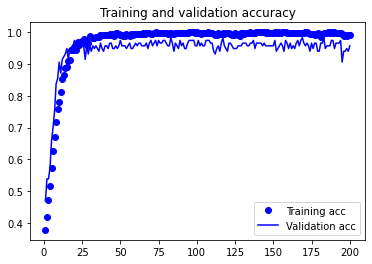

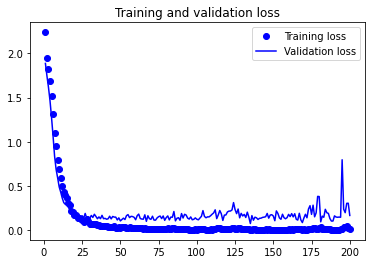

In [15]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the model as a file
#Test1.h5
models.save_model(model, '/Users/Willie/16k_500ms.h5')

In [17]:
# TEST: Load model and run it against test set
model = models.load_model('/Users/Willie/16k_500ms.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 9.0  Prediction: [[1.0227880e-14 2.3573896e-09 3.3159067e-18 5.6263207e-07 2.9182697e-13
  1.8513016e-11 3.4128142e-08 7.8497567e-07 4.8257166e-12 9.9988008e-01
  8.5352080e-11 8.3774369e-11 1.8856309e-11 6.4905333e-07 1.1801099e-04
  5.2713837e-11 5.0964617e-14 9.3181749e-14]]
Answer: 4.0  Prediction: [[1.9032074e-15 5.2706978e-10 9.4955430e-09 1.1625999e-15 9.9999738e-01
  5.0713027e-07 3.8616946e-11 1.7543572e-11 2.4231553e-14 7.7872301e-12
  2.5805102e-09 3.0336367e-10 7.9298512e-11 2.7164248e-11 1.9826889e-10
  2.0996224e-06 1.2341829e-10 1.1313061e-14]]
Answer: 5.0  Prediction: [[0.0000000e+00 1.4478741e-26 1.7936907e-28 0.0000000e+00 2.0677789e-22
  1.0000000e+00 0.0000000e+00 0.0000000e+00 6.9133573e-32 0.0000000e+00
  0.0000000e+00 2.2732384e-37 0.0000000e+00 4.3019080e-34 5.8826716e-37
  1.2135301e-25 0.0000000e+00 4.4239620e-34]]
Answer: 5.0  Prediction: [[0.0000000e+00 1.3716882e-33 0.0000000e+00 0.0000000e+00 1.7023465e-33
  1.0000000e+00 0.0000000e+00 0.0000000e+0

In [18]:
model.evaluate(x=x_test, y=y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.3742 - acc: 0.9487


[0.3742421865463257, 0.9487179517745972]

In [19]:
model.evaluate(x=x_train, y=y_train)

30/30 [==============================] - 0s 4ms/step - loss: 0.0061 - acc: 0.9968


[0.0061181290075182915, 0.9968152642250061]

In [20]:
model.evaluate(x=x_val, y=y_val)

4/4 [==============================] - 0s 6ms/step - loss: 0.1646 - acc: 0.9573


[0.16458706557750702, 0.9572649598121643]